# Natural Language Processing: Twitter Sentiment Analysis

Twitter is a particularly popular social network in the United States, where as of July 2019, the service had 48.65 million active users. Users on twitter create short messages called tweets to be shared with other twitter users who interact by sharing (retweeting) and / or responding. Twitter employs a message size restriction of 280 characters or less which forces the users to stay focused on the message they wish to disseminate. This very characteristic makes messages from twitter a good candidate for Natural Language Processing (NLP) machine learning tasks like sentiment analysis.

<font size=3>**"Something very big has just happened"**</font>

In this project, I attempt to use a Naive Bayes Classifier to extract sentiment analysis from tweets captured on twitter on for the keyword "Baghdadi". The tweets are from the day after the United States President Donald Trump confirms death of ISIS leader Abu Bakr al-Baghdadi. This topic is especially interesting because Trump went further than just announcing the raid’s success. He answered questions after his dramatic remarks, divulging an astonishing amount about US intelligence and American military operations that could benefit American adversaries in the future.

*What effect does killing the leader of a terrorist group like ISIS tend to have?*

Twitter users usually took to twitter to voice their opinions and I thought it would be a prime moment to explore the general sentiment of the country towards this political announcement.

### Preparing The Training Set

We will be using a downloadable Training set. The tweets of which were all labeled as positive, neutral or negative, depending on the content.

For this task, we will be using the tweet Corpus of over 1.6 million random tweets, as opposed to having humans manual annotate tweets.The paper from Stanford University students can be found [here](#https://cs.stanford.edu/people/alecmgo/papers/TwitterDistantSupervision09.pdf).

The corpus includes a the polarity of the tweet(pos/neg/neutral), the id, the date, the query, the user, and the text.You can get the file containing the corpus from this [Sentiment 140 website](#http://help.sentiment140.com/for-students)

we’ll use a Naive Bayes Classifier to learn the correct labels from this training set and do a binary classification. The Naive Bayes theorem calculates the probability of a certain event happening based on the joint probabilistic distributions of certain other events.

In [26]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [27]:
# load train data
data = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding = "ISO-8859-1")
data.columns = ['label','id','date','query','source','text']
data.head(2)

,label,id,date,query,source,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...


In [28]:
# get text and matching label columns
data = data.drop(['id','date','query','source'],axis=1)
data.head(10)

,label,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
5,0,Need a hug
6,0,@LOLTrish hey long time no see! Yes.. Rains a...
7,0,@Tatiana_K nope they didn't have it
8,0,@twittera que me muera ?
9,0,spring break in plain city... it's snowing


In [29]:
# check the number of positive, neutral, and negative tagged sentences
negatives = data['label'][data.label == 0]
neutral = data['label'][data.label == 2]
positive = data['label'][data.label == 4]

print('number of negative tagged sentences is:{}'.format(len(negatives)))
print('number of neutral tagged sentences is: {}'.format(len(neutral)))
print('number of positive tagged sentences is:{}'.format(len(positive)))
print('total length of the data is:           {}'.format(data.shape[0]))

number of negative tagged sentences is:799999
number of neutral tagged sentences is: 0
number of positive tagged sentences is:800000
total length of the data is:           1599999


In [30]:
# get a word count per sentence column
def word_count(sentence):
    return len(sentence.split())
    
data['word count'] = data['text'].apply(word_count)
data.head(3)

,label,text,word count
0,0,is upset that he can't update his Facebook by ...,21
1,0,@Kenichan I dived many times for the ball. Man...,18
2,0,my whole body feels itchy and like its on fire,10


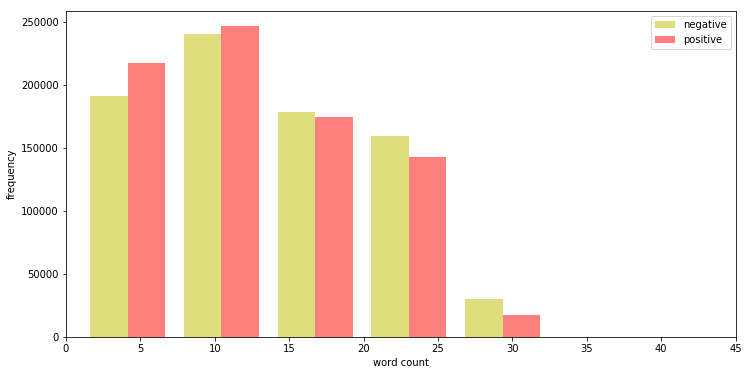

In [31]:
# plot word count distribution for both positive and negative sentiments
x = data['word count'][data.label == 0]
y = data['word count'][data.label == 4]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('word count')
plt.ylabel('frequency')
g = plt.hist([x, y], color=['y','r'], alpha=0.5, label=['negative','positive'])
plt.legend(loc='upper right')

we could see that most of the tweets word counts are within 30 words

In [32]:
from collections import Counter
# get most common words in training dataset
all_words = []
for line in list(data['text']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
    
    
Counter(all_words).most_common(10)

[('i', 746635),
 ('to', 560313),
 ('the', 518734),
 ('a', 376421),
 ('my', 312846),
 ('and', 295675),
 ('you', 237765),
 ('is', 231086),
 ('for', 214051),
 ('in', 209960)]

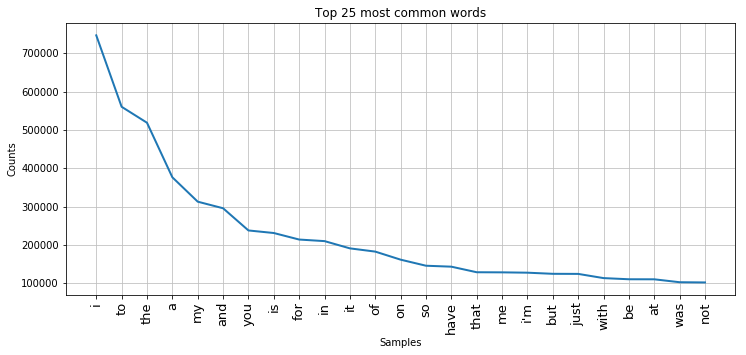

In [33]:
import nltk
#Below is a graph showing the frequency of the first 25 words.
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)

The word distribution present in this data is a very common phenomenon in large samples of words as shown by "Zipf's law", where the most frequent word will occur about twice as often as the second most frequent word, three times as often as the third most frequent word, etc.

### Download Twitter Data through API for Sentiment Analysis

In [34]:
import twitter

# initialize api instance
twitter_api = twitter.Api(consumer_key='9TR8xudCGfGpf8pZI0B1q5caN',
                        consumer_secret='EA4WiCVwcudtS6aCMOp70HOvN7F4XDTxGvTuoAkl4xsjBimHBe',
                        access_token_key='1185037074384093184-8AKwgmu63XWYcG0N8DpDe2vc4dekPh',
                        access_token_secret='3Ixk7zKqgniYFy4nXpHKNgGH2f7aNWf4HhrukDzDtwLkc')

# test authentication
print(twitter_api.VerifyCredentials())


{"created_at": "Fri Oct 18 03:37:15 +0000 2019", "default_profile": true, "friends_count": 20, "id": 1185037074384093184, "id_str": "1185037074384093184", "name": "ming_chi", "profile_background_color": "F5F8FA", "profile_image_url": "http://pbs.twimg.com/profile_images/1185037498692624385/6naRt9Jk_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/1185037498692624385/6naRt9Jk_normal.jpg", "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "screen_name": "mingchi0123"}


### Creating the function to build the Test set

In [45]:
def buildTestSet(search_keyword):
    try:
        tweets_fetched = twitter_api.GetSearch(search_keyword, count = 120)
        
        print("Fetched " + str(len(tweets_fetched)) + " tweets for the term " + search_keyword)
        
        return [{"text":status.text, "label":None} for status in tweets_fetched]
    except:
        print("Unfortunately, something went wrong..")
        return None

In [52]:
search_term = input("Enter a search keyword:")
testDataSet = buildTestSet(search_term)

print(testDataSet[0:5])

Enter a search keyword:Baghdadi
Fetched 100 tweets for the term Baghdadi
[{'text': 'US Special Forces: Knock Knock\n\nBaghdadi: Who’s there?\n\nUS Special Forces: Alla\n\nBaghdadi: Alla who?\n\nUS Special Forces: Alla who Akbar 💣', 'label': None}, {'text': 'I’M DISGUSTED! WHAT DISGRACE \n\nThe Washington Post called the ISIS leader a Religious Scholar instead of a  Terrori… https://t.co/NFL4eVJLLX', 'label': None}, {'text': 'Law-abiding gun owners are “terrorists” but Baghdadi is an “austere religious scholar.” \n\nAsk me again why I criticize some in media.', 'label': None}, {'text': 'RT @StormIsUponUs: Washington Post gushes affectionately over Baghdadi, Democrats silent on Twitter, and movie stars yelling at Trump for i…', 'label': None}, {'text': 'RT @ckkirsch1: I DON’T KNOW ABOUT YOU AMERICA,BUT I HAVE HAD ENOUGH OF THE BLATANT UNAMERICAN BS FROM WAPO. CANCEL ALL SUBSCRIPTIONS &amp; SUE…', 'label': None}]


In [53]:
import tweepy
from tweepy import OAuthHandler

consumer_key='9TR8xudCGfGpf8pZI0B1q5caN'
consumer_secret='EA4WiCVwcudtS6aCMOp70HOvN7F4XDTxGvTuoAkl4xsjBimHBe'
access_token='1185037074384093184-8AKwgmu63XWYcG0N8DpDe2vc4dekPh'
access_token_secret='3Ixk7zKqgniYFy4nXpHKNgGH2f7aNWf4HhrukDzDtwLkc'

# instantiate the api
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

# string to search on twitter
query = 'Baghdadi'

# open/create a csv file to append data
csvFile = open(query + 'training.1600000.processed.noemoticon.csv', 'w', encoding='utf-8')

# use csv Writer
csvWriter = csv.writer(csvFile)

# get data from twitter
tweet_num = 0
for tweet in tweepy.Cursor(api.search,q=query+ ' -RT',count=10000000,lang="en").items(100):
    if tweet.place is not None:
        try:
            # not entirely necessary but you can inspect what is being written to file
            print ('tweet number: {}'.format(tweet_num), tweet.text, tweet.place.full_name)
            # write data to csv
            csvWriter.writerow([tweet.created_at,
                                tweet.user.location,
                                tweet.user.followers_count,
                                tweet.user.friends_count,
                                tweet.text,
                                tweet.place.bounding_box.coordinates,
                                tweet.place.full_name,
                                tweet.place.country,
                                tweet.place.country_code,
                                tweet.place.place_type])
            tweet_num += 1
            
        except Exception:
            pass

tweet number: 0 If according to #WashingtonPost .... Abu al Baghdadi ... was an Austere Religious Scholar, then according to philos… https://t.co/furLJnjt3T New Delhi, India
tweet number: 1 If according to #WashingtonPost .... Abu al Baghdadi ... was an Austere Religious Scholar, then according to philos… https://t.co/W7Nf1PxDJ7 New Delhi, India
tweet number: 2 @MrMubinShaikh @AmarAmarasingam @ColinPClarke @ForeignPolicy If I'm not mistaken Mubin, #Baghdadi's successor will… https://t.co/WVcbkUsn8Q Roseburg, OR
